# Homework1
Ivy (Xinyue) Liu, 
xl438

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import scale

### 1. Regularization

In [2]:
# Download Hitters.csv
url = "https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv"
hitters = pd.read_csv(io.StringIO((requests.get(url).content).decode('utf-8')))
# View Data
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Data Cleaning:
# Check predictors' data type
hitters.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [4]:
# Drop all non-numeric predictors: Unnamed: 0, League, Division, NewLeague
hitters2 = hitters.dropna().drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)
hitters2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [5]:
# Fill NaN Values with mean
hitters3 = hitters2.apply(lambda x: x.fillna(x.mean()), axis=0)

In [6]:
# Convert data to numpy format, seperate predictors hittersx and target hittery
hittersx = hitters3.drop(['Salary'], axis=1)
hittersy = hitters3['Salary']

In [7]:
# Training set and test set split
hittersx_train, hittersx_test, hittersy_train, hittersy_test = train_test_split(hittersx, hittersy, test_size = 0.3, random_state = 916)

### 1.1 Lasso Regression

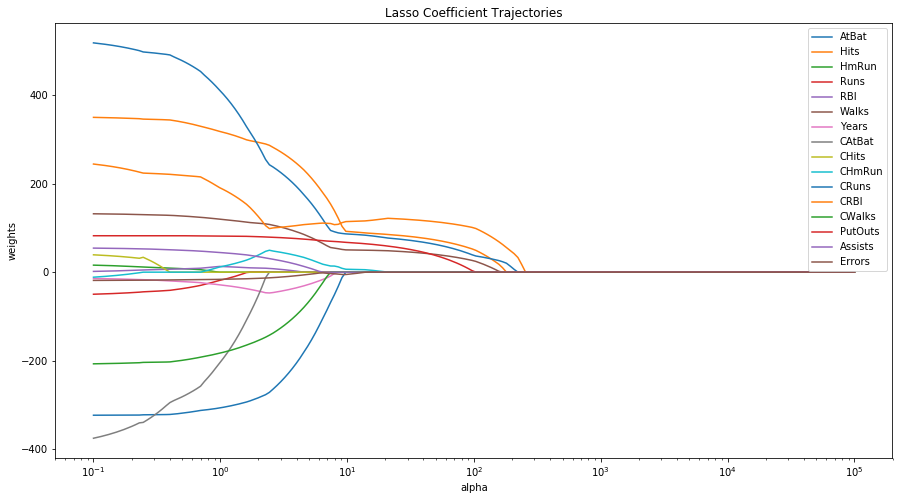

In [8]:
# Create Alpha Values array
alphas = np.logspace(-1, 5, 200)
# print(alphas)
# Predict Salary from the other numeric predictors
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=1e4)
    lasso.fit(scale(hittersx), hittersy)
    coefs.append(lasso.coef_)
    
# Visualization of Laaso coefficient trajectories
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("Lasso Coefficient Trajectories")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")
ax.legend(hittersx.columns)
plt.show()

In [9]:
# Final 3 predictors that remain in the model
for c in coefs:
    if (c > 0).sum() == 3:
        coef_i = [i for i, v in enumerate(c) if v != 0]
        break

print("Final 3 predictors that remain in the models are: ", list(hittersx.columns[coef_i]))

Final 3 predictors that remain in the models are:  ['Hits', 'CRuns', 'CRBI']


In [10]:
# Use cross-validation to find the optimal value of the regularization penality
lasso_cv = LassoCV(alphas=alphas, cv=10, fit_intercept=False, max_iter=1e4)
lasso_cv.fit(scale(hittersx), hittersy)
print("The optimal value of the regularization penality from cross validation is: ", lasso_cv.alpha_)

The optimal value of the regularization penality from cross validation is:  22.47805833548725


In [11]:
lasso_remainpred = len([i for i in lasso_cv.coef_ if i != 0])
print("The number of predictors left in the model is: ", lasso_remainpred)

The number of predictors left in the model is:  5


### 1.2 Ridge Regression

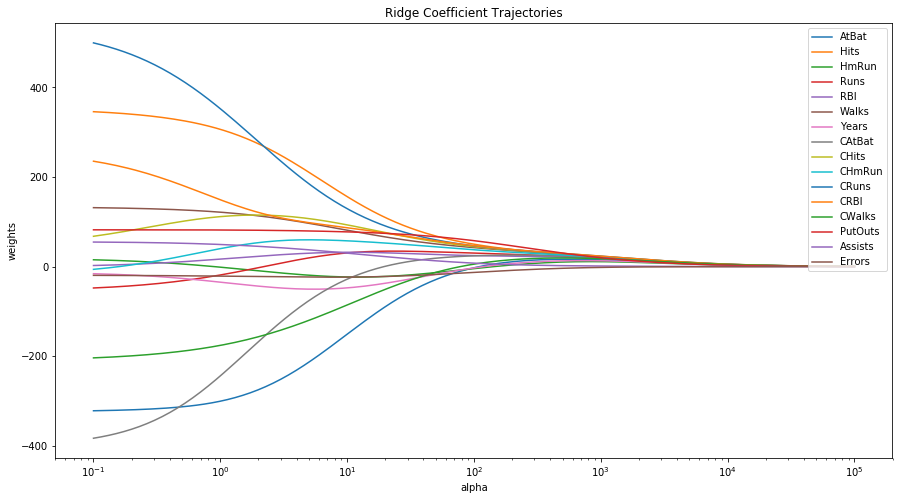

In [12]:
# Create Alpha Values array
alphas = np.logspace(-1, 5, 200)
# print(alphas)
# Predict Salary from the other numeric predictors
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False, max_iter=1e4)
    ridge.fit(scale(hittersx), hittersy)
    coefs.append(ridge.coef_)
    
# Visualization of Laaso coefficient trajectories
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("Ridge Coefficient Trajectories")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")
ax.legend(hittersx.columns, loc="upper right")
plt.show()

In [13]:
# Use cross-validation to find the optimal value of the regularization penality
ridge_cv = RidgeCV(alphas=alphas, cv=10, fit_intercept=False)
ridge_cv.fit(scale(hittersx), hittersy)
print("The optimal value of the regularization penality from cross validation is: ", ridge_cv.alpha_)

The optimal value of the regularization penality from cross validation is:  587.2786613189477


### 2. Short Answer

In statistics, bias is is the difference between expected value and the true value, while variance measures how far a set of numbers are distribute from average. The bias-variance tradeoff Usually the model with high variance has low bias and vice versa. It also describes the problem of overfitting/underfitting, models with higher flexibility usually has low bias and high variance, vice versa.


In (1), when we use large regularization pennalty alpha, the model tends to have higher bias and lower variance (less flexible), when the regularization penalty is small, the model tends to have lower bias and higher variance (more flexible) but might be overfitting. From the plots, we can see that there are more features in the model when alpha is smaller, the model has higher variance and lower bias.